<a href="https://colab.research.google.com/github/aiahsaniqbal/Instance-Segmentation/blob/main/Tree_instance_Segmentation_Train_Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Training of Mask_Rcnn**
- Provided the dataset.zip file containing the images
- sample.json file for House annotations in those images
- Model are produced in Mask_RCNN/log/obj/....h5, which can be used to evaluate

**Change the path below**

- Path to dataset images of dataset.zip file, and annotation of houses of sample.json is set below

In [ ]:
#change the following path
images_path = "/content/drive/MyDrive/Softeq/instance_segmentation/dataset.zip"
annotations_path = "/content/drive/MyDrive/Softeq/instance_segmentation/sample_tree.json"


In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

--2022-02-17 07:44:24--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 188.114.97.3, 188.114.96.3, 2a06:98c1:3120::3, ...
Connecting to pysource.com (pysource.com)|188.114.97.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip.1’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.03s   

2022-02-17 07:44:24 (46.3 MB/s) - ‘Mask_RCNN_basic_1.zip.1’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
replace Mask_RCNN/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!nvidia-smi

Thu Feb 17 07:45:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 15 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/Softeq/instance_segmentation/sample_tree.json
Annotation json path:  /content/drive/MyDrive/Softeq/instance_segmentation/sample_tree.json
Train: 12
Validation: 1
Classes: 1


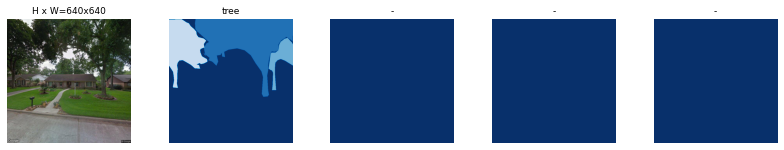

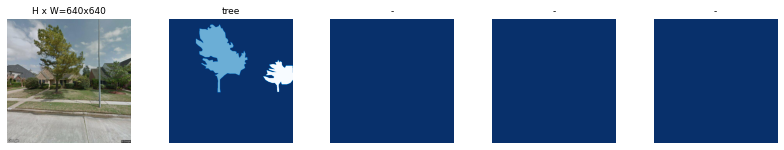

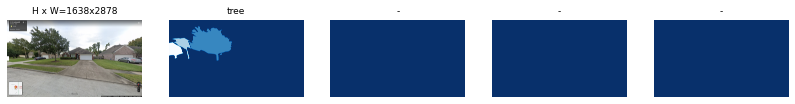

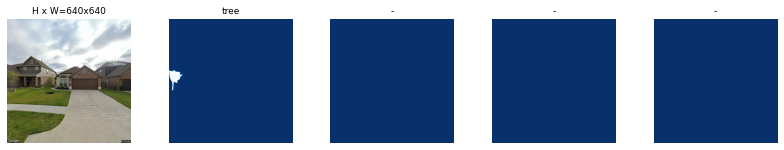

In [ ]:
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220217T0747/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

**2) Testing on Validation Image**

In [ ]:
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220217T0747/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


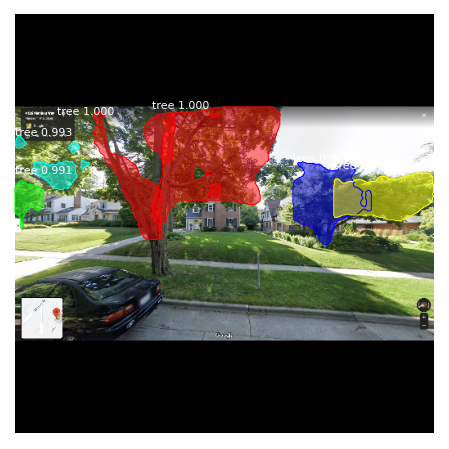

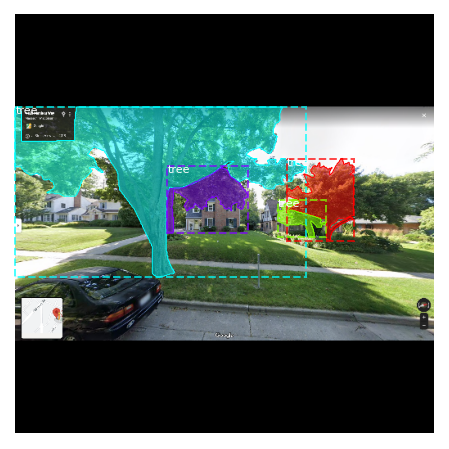

In [ ]:
test_random_image(test_model, dataset_val, inference_config)

**3) Results on Test set**
- Stores the ouput Images to test_output Folder in google_drive
- Load the latest Model in folder log/obj/...

**Change the path below**

- Change the path to your test set (test set image from this location are read for testing)
- change the path to your trained weights_path (pretrained weights are read from this location)
- change the path to your Ouput (output images would be saved to this location)

In [ ]:
#change the following path
t_path="/content/drive/MyDrive/Softeq/instance_segmentation/testset.zip"
trained_weights_path="/content/Mask_RCNN/logs/object20220217T0747/mask_rcnn_object_0005.h5"

test_output="/content/drive/MyDrive/Softeq/instance_segmentation/test_ouput_tree"

In [ ]:
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

In [ ]:

extract_images(os.path.join("/content/",t_path), "/content/testset")
test_model, inference_config = load_inference_model(1, trained_weights_path)

Extracted: 8 images
Loading weights from  /content/Mask_RCNN/logs/object20220217T0747/mask_rcnn_object_0005.h5
Re-starting from epoch 5


In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
data_testset=0
data_testset=load_images_from_folder("/content/testset")

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image 

In [ ]:
value_count_output=0

for img in data_testset:
  value_count_output+=1
  print(value_count_output)
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Detect results
  r = test_model.detect([image])[0]
  colors = random_colors(80)
  object_count = len(r["class_ids"])
  i=0
  for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
  cv2.imwrite(test_output+str(value_count_output)+'.jpg',img)

1
2
3
4
5
6
7
8


In [ ]:
#path that contains folder you want to copy
%cd /content/Mask_RCNN
%cp -av logs /content/drive/MyDrive/Softeq/instance_segmentation/logs_tree

/content/Mask_RCNN
'logs' -> '/content/drive/MyDrive/Softeq/instance_segmentation/logs_tree'
'logs/object20220217T0747' -> '/content/drive/MyDrive/Softeq/instance_segmentation/logs_tree/object20220217T0747'
'logs/object20220217T0747/events.out.tfevents.1645084034.4df8b85c6d76' -> '/content/drive/MyDrive/Softeq/instance_segmentation/logs_tree/object20220217T0747/events.out.tfevents.1645084034.4df8b85c6d76'
'logs/object20220217T0747/mask_rcnn_object_0001.h5' -> '/content/drive/MyDrive/Softeq/instance_segmentation/logs_tree/object20220217T0747/mask_rcnn_object_0001.h5'
'logs/object20220217T0747/mask_rcnn_object_0002.h5' -> '/content/drive/MyDrive/Softeq/instance_segmentation/logs_tree/object20220217T0747/mask_rcnn_object_0002.h5'
'logs/object20220217T0747/mask_rcnn_object_0003.h5' -> '/content/drive/MyDrive/Softeq/instance_segmentation/logs_tree/object20220217T0747/mask_rcnn_object_0003.h5'
'logs/object20220217T0747/mask_rcnn_object_0004.h5' -> '/content/drive/MyDrive/Softeq/instance_segm